# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 639


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()
        

         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | guerrero negro
Processing Record 5 of Set 1 | tuatapere
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | bundaberg
Processing Record 8 of Set 1 | along
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | bulungu
Processing Record 12 of Set 1 | nome
Processing Record 13 of Set 1 | muli
Processing Record 14 of Set 1 | el sauzal
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | souillac
Processing Record 18 of Set 1 | usinsk
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | cenade
Processing Record 

Processing Record 40 of Set 4 | nanortalik
Processing Record 41 of Set 4 | sechura
Processing Record 42 of Set 4 | seymchan
Processing Record 43 of Set 4 | inhambane
Processing Record 44 of Set 4 | necochea
Processing Record 45 of Set 4 | nanga eboko
Processing Record 46 of Set 4 | nguiu
City not found. Skipping...
Processing Record 47 of Set 4 | hihifo
City not found. Skipping...
Processing Record 48 of Set 4 | marawi
Processing Record 49 of Set 4 | rotherham
Processing Record 0 of Set 5 | tsienyane
City not found. Skipping...
Processing Record 1 of Set 5 | pacific grove
Processing Record 2 of Set 5 | tsevie
Processing Record 3 of Set 5 | swiecie
Processing Record 4 of Set 5 | lompoc
Processing Record 5 of Set 5 | bukachacha
Processing Record 6 of Set 5 | marzuq
Processing Record 7 of Set 5 | chokurdakh
Processing Record 8 of Set 5 | yulara
Processing Record 9 of Set 5 | puerto colombia
Processing Record 10 of Set 5 | itarema
Processing Record 11 of Set 5 | vestmanna
Processing Record

Processing Record 24 of Set 8 | tocopilla
Processing Record 25 of Set 8 | florianopolis
Processing Record 26 of Set 8 | korla
Processing Record 27 of Set 8 | jatara
Processing Record 28 of Set 8 | ponta delgada
Processing Record 29 of Set 8 | laguna
Processing Record 30 of Set 8 | lebanon
Processing Record 31 of Set 8 | brigantine
Processing Record 32 of Set 8 | guajara-mirim
City not found. Skipping...
Processing Record 33 of Set 8 | camocim
Processing Record 34 of Set 8 | shieli
Processing Record 35 of Set 8 | bethel
Processing Record 36 of Set 8 | luziania
Processing Record 37 of Set 8 | comodoro rivadavia
Processing Record 38 of Set 8 | lavrentiya
Processing Record 39 of Set 8 | saint-augustin
Processing Record 40 of Set 8 | sorkjosen
Processing Record 41 of Set 8 | synya
Processing Record 42 of Set 8 | kesinga
Processing Record 43 of Set 8 | brae
Processing Record 44 of Set 8 | tamandare
Processing Record 45 of Set 8 | touros
Processing Record 46 of Set 8 | mecca
Processing Record

Processing Record 12 of Set 12 | yeltsovka
City not found. Skipping...
Processing Record 13 of Set 12 | berdigestyakh
Processing Record 14 of Set 12 | belturbet
Processing Record 15 of Set 12 | port elizabeth
Processing Record 16 of Set 12 | urdoma
Processing Record 17 of Set 12 | belmonte
Processing Record 18 of Set 12 | agua verde
Processing Record 19 of Set 12 | camana
Processing Record 20 of Set 12 | cascais
Processing Record 21 of Set 12 | kavieng
Processing Record 22 of Set 12 | burnie
Processing Record 23 of Set 12 | togur
Processing Record 24 of Set 12 | iquique
Processing Record 25 of Set 12 | tupiza
Processing Record 26 of Set 12 | swindon
Processing Record 27 of Set 12 | kalmunai
Processing Record 28 of Set 12 | hendijan
City not found. Skipping...
Processing Record 29 of Set 12 | zhitikara
City not found. Skipping...
Processing Record 30 of Set 12 | buchanan
Processing Record 31 of Set 12 | sillamae
Processing Record 32 of Set 12 | pindiga
Processing Record 33 of Set 12 | g

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,299.08,72,100,2.60,PF,1675467092
1,port alfred,-33.5906,26.8910,293.81,92,50,1.34,ZA,1675467092
2,guerrero negro,27.9769,-114.0611,292.47,36,100,3.69,MX,1675466801
3,tuatapere,-46.1333,167.6833,301.36,40,1,2.85,NZ,1675467093
4,new norfolk,-42.7826,147.0587,288.10,88,100,0.89,AU,1675467094


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,299.08,72,100,2.60,PF,1675467092
1,port alfred,-33.5906,26.8910,293.81,92,50,1.34,ZA,1675467092
2,guerrero negro,27.9769,-114.0611,292.47,36,100,3.69,MX,1675466801
3,tuatapere,-46.1333,167.6833,301.36,40,1,2.85,NZ,1675467093
4,new norfolk,-42.7826,147.0587,288.10,88,100,0.89,AU,1675467094


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

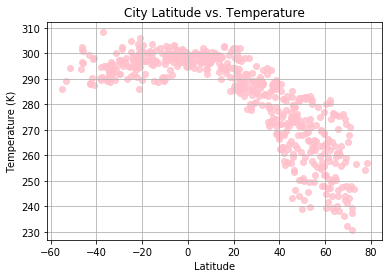

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="pink", alpha=.80)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (K)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

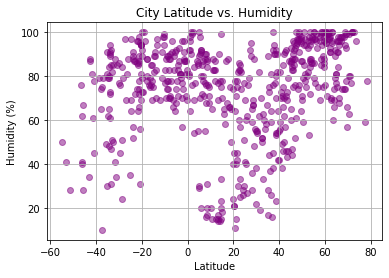

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="purple", alpha=.50)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

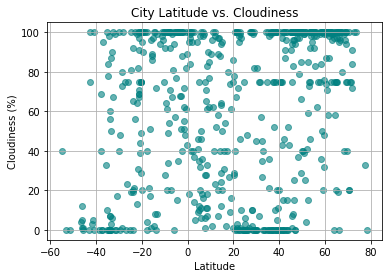

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="teal", alpha=.60)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

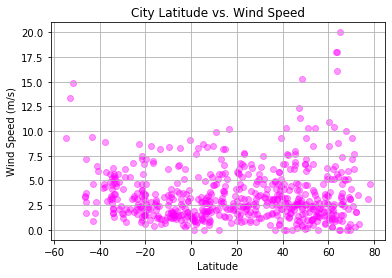

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="magenta", alpha=.40)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,guerrero negro,27.9769,-114.0611,292.47,36,100,3.69,MX,1675466801
6,along,28.1667,94.7667,283.69,59,10,0.80,IN,1675467095
8,dikson,73.5069,80.5464,256.72,96,100,0.62,RU,1675467095
10,nome,64.5011,-165.4064,257.19,92,100,0.00,US,1675467081
11,muli,2.9167,73.5667,299.69,69,100,5.35,MV,1675467096


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,299.08,72,100,2.60,PF,1675467092
1,port alfred,-33.5906,26.8910,293.81,92,50,1.34,ZA,1675467092
3,tuatapere,-46.1333,167.6833,301.36,40,1,2.85,NZ,1675467093
4,new norfolk,-42.7826,147.0587,288.10,88,100,0.89,AU,1675467094
5,bundaberg,-24.8500,152.3500,304.94,64,81,1.79,AU,1675467094


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7273979270920538


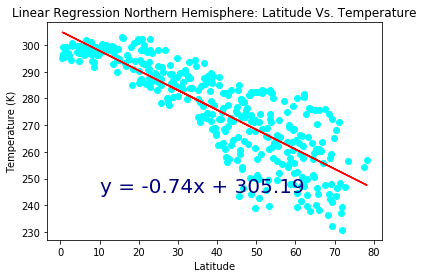

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="cyan")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10,245), fontsize=20, color="navy")
plt.xlabel("Latitude")
plt.ylabel("Temperature (K)")
plt.title("Linear Regression Northern Hemisphere: Latitude Vs. Temperature")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.15726361412350376


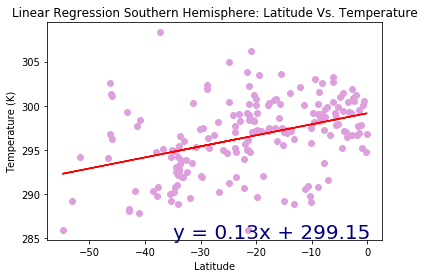

In [42]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="plum")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-35,285), fontsize=20, color="navy")
plt.xlabel("Latitude")
plt.ylabel("Temperature (K)")
plt.title("Linear Regression Southern Hemisphere: Latitude Vs. Temperature")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a strong negative coorelation between max temperatures and the northern hemisphere while there is a moderate positive coorelation between max temperatures and the southern hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.14500493366548114


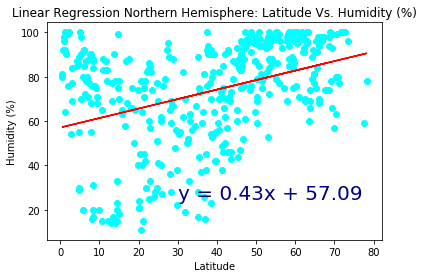

In [45]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="cyan")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(30,25), fontsize=20, color="navy")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Linear Regression Northern Hemisphere: Latitude Vs. Humidity (%)")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.18032874357167833


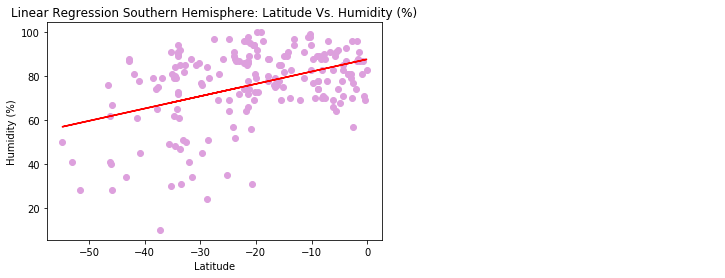

In [46]:
# Southern Hemisphere
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"
plt.scatter(x_values, y_values, facecolors="plum")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(30,25), fontsize=20, color="navy")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Linear Regression Southern Hemisphere: Latitude Vs. Humidity (%)")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The Northen hemisphere has a moderate positive coorelation between latitude and humidity while the Southern hemisphere has weak positive coorelation between latitude and humidity

### Cloudiness vs. Latitude Linear Regression Plot

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE